In [1]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import Dataset ,DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, datasets
from sklearn.datasets import make_moons, make_circles
import sklearn.datasets
from matplotlib.axis import Axis

%run functions2D-2.ipynb

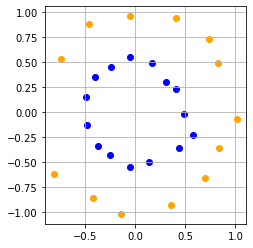

In [2]:
np.random.seed(0)
X, y = sklearn.datasets.make_circles(n_samples=30, noise = 0.05, factor = 0.5)
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.FloatTensor)


epsilon = 0.3
X2 = X.numpy()
y2 = y.numpy()
b = np.logical_or(X2.dot(np.array([epsilon,1])) > 0 , X2.dot(np.array([epsilon,-1])) >0 )
b = np.logical_and(b,y2==0)
b = np.logical_or(b, y2==1)
X3 = X2[b,:]

y_labels = y2[b]

x0,y0 = seperatePoints1(X3)
fig, axs = plt.subplots(1,1)
axs.set_aspect('equal')

axs.scatter(X3[:, 0][y_labels==1],X3[:, 1][y_labels==1], color='b')
axs.scatter(X3[:, 0][y_labels==0],X3[:, 1][y_labels==0], color='orange')

plt.grid()
plt.show()

# Weights

In [3]:
weights1 = np.array(([ 2. ,3.33333333],
 [ 2.    ,     -3.33333333]))

weights2 = np.array(([ 0.40923567, -0.09076433],
 [-0.09076433 , 0.40923567]))

weights3 = np.array(([ 1.75 , 0.75],
 [ 0.75 , 1.75]))

weights4 = np.array(([ 1,1]))

bias1 = np.array(([3.3,3.3]))

bias2 = np.array(([-0.31847134,-0.31847134]))

bias3 = np.array(([-2.5,-2.5]))

bias4 = np.array(([-1]))


W1 = matrix_from_weights(weights1, bias1)
W2 = matrix_from_weights(weights2, bias2)
W3 = matrix_from_weights(weights3, bias3)

W4 = np.array(([1,  1, -1],[0,0,1]))

W1_ = np.linalg.inv(W1)
W2_ = np.linalg.inv(W2)
W3_ = np.linalg.inv(W3)
W21 = W2.dot(W1)
W21_ = np.linalg.inv(W21)
W31 = W3.dot(W21)
W31_ = np.linalg.inv(W31)
W41 = np.matmul(W4,(np.matmul(W3, W21)))
print(W31)
print(W41)

[[ 1.5923567   1.66666667 -0.6687898 ]
 [ 1.5923567  -1.66666666 -0.6687898 ]
 [ 0.          0.          1.        ]]
[[ 3.18471340e+00  2.22044605e-16 -2.33757959e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


# Layer-1

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

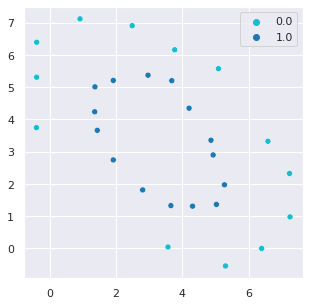

In [4]:
palette = {0:"tab:cyan",
           1:"tab:blue", 
           }

#transform the original data

t1 = applyWeights_on_original(W1,X3)

#get points
x1,y1 = seperatePoints(t1)


#Apply ReLU
x1r = applyRelu(x1)
y1r = applyRelu(y1)


sns.set(rc = {'figure.figsize':(5,5)})
sns.scatterplot(x1,y1, hue = y_labels, palette = palette)


In [5]:
#coordinates in original space
t1f = makeList1(x1r,y1r)
t1reversed = applyWeightsInverse(W1, t1f)
x1o,y1o = seperatePoints(t1reversed)

t1r_set = makeList(x1o,y1o) #relu in original space
original_set = makeList(x0,y0) #original data points without transformation

In [6]:
#first 2 hyperplanes
s = 5
ss = np.linspace(-s,5, 2000)
x11,y11 =Generate_Line([bias1[0],weights1[0][0],weights1[0][1]],ss)
x12,y12 = Generate_Line([bias1[1],weights1[1][0],weights1[1][1]],ss)

line1 = makeList1(x11,y11)
line2 = makeList1(x12,y12)



In [7]:

t11,f11 = check_pos_l1(W1,line1)
t12,f12 = check_pos_l1(W1,line2)


In [8]:
#solid and dotted lines
x11s, y11s = seperatePoints(t11)
x11d, y11d = seperatePoints(f11)
x12s, y12s = seperatePoints(t12)
x12d, y12d = seperatePoints(f12)

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


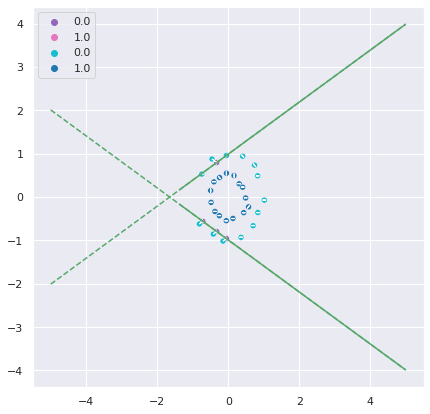

In [9]:

#first 2 hyperplanes
s = 5
ss = np.linspace(-s,5, 2000)
x11,y11 =Generate_Line([bias1[0],weights1[0][0],weights1[0][1]],ss)
x12,y12 = Generate_Line([bias1[1],weights1[1][0],weights1[1][1]],ss)
palette2 = {0:"tab:purple",
           1:"tab:pink", 
           }

sns.set(rc = {'figure.figsize':(7,7)})
# plt.locator_params('y', nbins=100)
#     # adjust the x axis scale.
# plt.locator_params('x', nbins=100)
sns.scatterplot(x1o,y1o, hue = y_labels, palette = palette2)
sns.scatterplot(x0,y0, hue = y_labels, palette = palette)
plt.plot(x11s, y11s, c ="g")
plt.plot(x11d, y11d, c ="g",linestyle = '--')
plt.plot(x12s, y12s, c ="g")
plt.plot(x12d, y12d, c ="g",linestyle = '--')
# plt.xticks(range(1, 5))
# plt.yticks(range(1, 5))
for i in range(len(original_set)):
        plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
                  head_width=0.1, head_length=0.01)

# Layer-2

In [10]:
# t1f = makeList1(x1r,y1r)
t2 = applyWeights(W2,t1f) #apply on 1st layer relu'd points
#get points
x2,y2 = seperatePoints(t2)
#Apply ReLU
x2r = applyRelu(x2)
y2r = applyRelu(y2)
# sns.scatterplot(x2,y2, hue = data['class'], palette = palette)

weights21 = W2.dot(W1)
W21 = weights21
print(weights21)


#coordinates in original space
t2f = makeList1(x2r,y2r)


t2reversed = applyWeightsInverse(W21, t2f)
x2o,y2o = seperatePoints(t2reversed)
t2r_set = makeList(x2o,y2o)

#Layer 2 hyperplanes
s = 5
ss = np.linspace(-s,5, 2000)
x21,y21 = Generate_Line([weights21[0][2],weights21[0][0],weights21[0][1]],ss)
x22,y22 = Generate_Line([weights21[1][2],weights21[1][0],weights21[1][1]],ss)

line3 = makeList1(x21,y21)
line4 = makeList1(x22,y22)

def check_pos_previous(weights_matrix,data_ls):
    true = []
    false = []
    for i in data_ls:
        ls0 = applyWeights(weights_matrix,data_ls)
    for l,j in zip(data_ls,ls0):
        if ((j[0]>=0 and j[1]>=0) or (j[0]==0 and j[1]==0) or (j[0]>=0 and j[1]==0) or (j[1]>=0 and j[0]==0)):
            true.append(l)
        else:
            false.append(l)
    return true,false

def check_pos_current(weights_matrix,data_ls): #only checks if line is the basis 
    true = []
    false = []
    ls0=[]
    for i in data_ls:
        ls0 = applyWeights(weights_matrix,data_ls)
    for l,j in zip(data_ls,ls0):
        if ((j[0]==0 and j[1]==0) or (j[0]>=0 and j[1]==0) or (j[1]>=0 and j[0]==0)):
            true.append(l)
        else:
            false.append(l)
    return true,false




[[ 0.63694268  1.66666666  0.73248408]
 [ 0.63694268 -1.66666666  0.73248408]
 [ 0.          0.          1.        ]]


In [11]:
t21,f21 = check_pos_previous(W1,line3)
t22,f22 = check_pos_previous(W1,line4)

In [12]:
tru21,fal21 = check_pos_current(W21,t21)
tru22,fal22 = check_pos_current(W21,t22)


In [13]:
#graph them
x21s, y21s = seperatePoints(tru21)
x21d, y21d = seperatePoints(fal21)
x22s, y22s = seperatePoints(tru22)
x22d, y22d = seperatePoints(fal22)

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


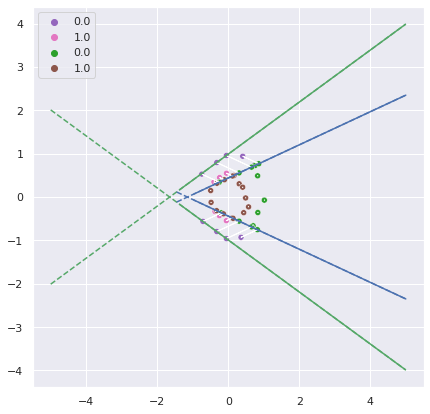

In [14]:
# print(y3)

palette3 = {0:"tab:green",
           1:"tab:brown", 
           }
sns.set(rc = {'figure.figsize':(7,7)})
sns.scatterplot(x1o,y1o, hue = y_labels, palette = palette2)
sns.scatterplot(x2o,y2o, hue = y_labels, palette = palette3)
# sns.scatterplot(x0,y0, hue = y_labels, palette = palette)

# plt.locator_params('y', nbins=100)
#     # adjust the x axis scale.
# plt.locator_params('x', nbins=100)
# plt.plot(x21, y21, c ="pink")
# plt.plot(x22, y22, c ="pink")

plt.plot(x11s, y11s, c ="g")
plt.plot(x11d, y11d, c ="g",linestyle = '--')
plt.plot(x12s, y12s, c ="g")
plt.plot(x12d, y12d, c ="g",linestyle = '--')
# plt.plot(x21, y21, c ="b")
# plt.plot(x22, y22, c ="b")
# plt.plot(x31, y31, c = "r")
plt.plot(x21s, y21s, c ="b")
plt.plot(x21d, y21d, c ="b",linestyle = '--')
plt.plot(x22s, y22s, c ="b")
plt.plot(x22d, y22d, c ="b",linestyle = '--')
# for i in range(len(original_set)):
#         plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
#                   head_width=0.01, head_length=0.01)
for i in range(len(original_set)):
        plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
                  head_width=0.01, head_length=0.01)
        
        


# Layer 3

In [15]:
# t1f = makeList1(x1r,y1r)
t3 = applyWeights(W3,t2f) #apply on 1st layer relu'd points
#get points
x3,y3 = seperatePoints(t3)
#Apply ReLU
x3r = applyRelu(x3)
y3r = applyRelu(y3)
# sns.scatterplot(x2,y2, hue = data['class'], palette = palette)

weights31 = W3.dot(W2.dot(W1))


#coordinates in original space
t3f = makeList1(x3r,y3r)


t3reversed = applyWeightsInverse(W31, t3f)
x3o,y3o = seperatePoints(t3reversed)
t3r_set = makeList(x3o,y3o) #points in original space

#Layer 2 hyperplanes
s = 5
ss = np.linspace(-s,5, 2000)
x31,y31 = Generate_Line([weights31[0][2],weights31[0][0],weights31[0][1]],ss)
x32,y32 = Generate_Line([weights31[1][2],weights31[1][0],weights31[1][1]],ss)

line5 = makeList1(x31,y31)
line6 = makeList1(x32,y32)

def check_pos_previous(weights_matrix,data_ls): #check if in positive region of previous basis
    truels = []
    falsels = []
    ls0 = []
    for i in data_ls:
        ls0 = applyWeights(weights_matrix,data_ls)
    for l,j in zip(data_ls,ls0):
        if ((j[0]>=0 and j[1]>=0) or (j[0]==0 and j[1]==0) or (j[0]>=0 and j[1]==0) or (j[1]>=0 and j[0]==0)):
            truels.append(l)
        else:
            falsels.append(l)
    return truels,falsels

def check_pos_current(weights_matrix,data_ls): #only checks if line is the basis 
    truels = []
    falsels = []
    ls0=[]
    for i in data_ls:
        ls0 = applyWeights(weights_matrix,data_ls)
    for l,j in zip(data_ls,ls0):
        if ((j[0]==0 and j[1]==0) or (j[0]>=0 and j[1]==0) or (j[1]>=0 and j[0]==0)):
            truels.append(l)
        else:
            falsels.append(l)
    return truels,falsels




In [16]:
t31,f31 = check_pos_previous(W1,line5)
t32,f32 = check_pos_previous(W1,line6)

In [17]:
t31,f31 = check_pos_previous(W21,t31)
t32,f32 = check_pos_previous(W21,t32)

In [18]:
tru31,fal31 = check_pos_current(W31,t31)
tru32,fal32 = check_pos_current(W31,t32)


In [19]:
#graph them
x31s, y31s = seperatePoints(tru31)
x31d, y31d = seperatePoints(fal31)
x32s, y32s = seperatePoints(tru32)
x32d, y32d = seperatePoints(fal32)

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


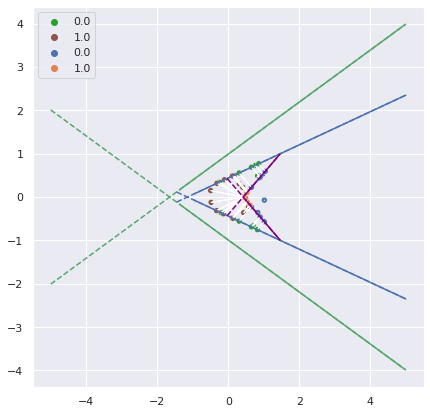

In [20]:
# palette4 = {0:"tab: #091e75",
#            1:"tab: #090364" 
#            }
# Create an array with the colors you want to use
colors = ["#FF0B04", "#4374B3"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

sns.set(rc = {'figure.figsize':(7,7)})
# sns.scatterplot(x0,y0, hue = y_labels, palette = palette)
# sns.scatterplot(x1o,y1o, hue = y_labels, palette = palette2)
sns.scatterplot(x2o,y2o, hue = y_labels, palette = palette3)
sns.scatterplot(x3o,y3o, hue = y_labels, palette=customPalette)


# plt.locator_params('y', nbins=100)
#     # adjust the x axis scale.
# plt.locator_params('x', nbins=100)
# plt.plot(x21, y21, c ="pink")
# plt.plot(x22, y22, c ="pink")

plt.plot(x11s, y11s, c ="g")
plt.plot(x11d, y11d, c ="g",linestyle = '--')
plt.plot(x12s, y12s, c ="g")
plt.plot(x12d, y12d, c ="g",linestyle = '--')
# plt.plot(x21, y21, c ="b")
# plt.plot(x22, y22, c ="b")
# plt.plot(x31, y31, c = "r")
plt.plot(x21s, y21s, c ="b")
plt.plot(x21d, y21d, c ="b",linestyle = '--')
plt.plot(x22s, y22s, c ="b")
plt.plot(x22d, y22d, c ="b",linestyle = '--')

plt.plot(x31s, y31s, c ="purple")
plt.plot(x31d, y31d, c ="purple",linestyle = '--')
plt.plot(x32s, y32s, c ="purple")
plt.plot(x32d, y32d, c ="purple",linestyle = '--')
# for i in range(len(original_set)):
#         plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
#                   head_width=0.01, head_length=0.01)
# for i in range(len(original_set)):
#         plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
#                   head_width=0.01, head_length=0.01)
for i in range(len(original_set)):
        plt.arrow(t2r_set[i][0],t2r_set[i][1], t3r_set[i][0]-t2r_set[i][0],t3r_set[i][1]-t2r_set[i][1] , 
                  head_width=0.01, head_length=0.01)
        
       


# Layer 4

In [21]:
s = 5
ss = np.linspace(-s,5, 2000)
x41,y41 =Generate_Line([-2.33757959,3.18471340, 0] ,ss)

In [22]:
line7 = makeList1(x41,y41)
t41,f41 = check_pos_previous(W1,line7)
t41,f41 = check_pos_previous(W21,t41)
t41,f41 = check_pos_previous(W31,t41)

x41s, y41s = seperatePoints(t41)
x41d, y41d = seperatePoints(f41)

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


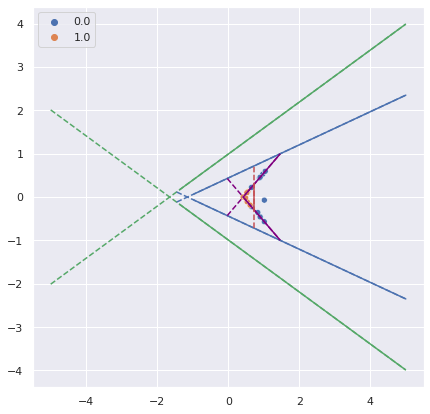

In [23]:
# palette4 = {0:"tab: #091e75",
#            1:"tab: #090364" 
#            }
# Create an array with the colors you want to use
colors = ["#FF0B04", "#4374B3"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

sns.set(rc = {'figure.figsize':(7,7)})
# sns.scatterplot(x0,y0, hue = y_labels, palette = palette)
# sns.scatterplot(x1o,y1o, hue = y_labels, palette = palette2)
# sns.scatterplot(x2o,y2o, hue = y_labels, palette = palette3)
sns.scatterplot(x3o,y3o, hue = y_labels, palette=customPalette)


# plt.locator_params('y', nbins=100)
#     # adjust the x axis scale.
# plt.locator_params('x', nbins=100)
# plt.plot(x21, y21, c ="pink")
# plt.plot(x22, y22, c ="pink")

plt.plot(x11s, y11s, c ="g")
plt.plot(x11d, y11d, c ="g",linestyle = '--')
plt.plot(x12s, y12s, c ="g")
plt.plot(x12d, y12d, c ="g",linestyle = '--')
# plt.plot(x21, y21, c ="b")
# plt.plot(x22, y22, c ="b")

plt.plot(x21s, y21s, c ="b")
plt.plot(x21d, y21d, c ="b",linestyle = '--')
plt.plot(x22s, y22s, c ="b")
plt.plot(x22d, y22d, c ="b",linestyle = '--')

plt.plot(x31s, y31s, c ="purple")
plt.plot(x31d, y31d, c ="purple",linestyle = '--')
plt.plot(x32s, y32s, c ="purple")
plt.plot(x32d, y32d, c ="purple",linestyle = '--')

plt.plot(x41s, y41s, c ="r")
plt.plot(x41d, y41d, c ="r",linestyle = '--')

# for i in range(len(original_set)):
#         plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
#                   head_width=0.01, head_length=0.01)
# for i in range(len(original_set)):
#         plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
#                   head_width=0.01, head_length=0.01)
# for i in range(len(original_set)):
#         plt.arrow(t2r_set[i][0],t2r_set[i][1], t3r_set[i][0]-t2r_set[i][0],t3r_set[i][1]-t2r_set[i][1] , 
#                   head_width=0.01, head_length=0.01)
        
       

# L = np.array([3.18471340, 2.22044605e-16, -2.33757959])
# La = line_to_array(L, [-1, 3], 1)
# #print(La)
# plt.plot(La[:,0], La[:,1], 'r')
# for p in La:
#     plt.plot(p[0], p[1], 'bo')

# Complete Transition 

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

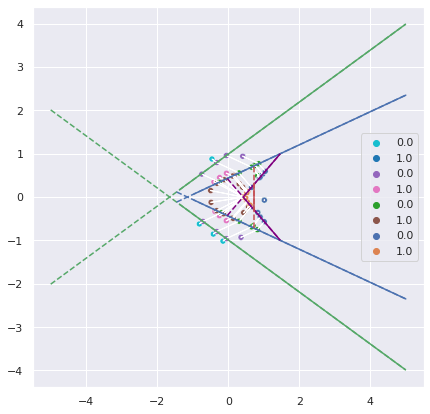

In [24]:
# palette4 = {0:"tab: #091e75",
#            1:"tab: #090364" 
#            }
# Create an array with the colors you want to use
colors = ["#FF0B04", "#4374B3"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

sns.set(rc = {'figure.figsize':(7,7)})
sns.scatterplot(x0,y0, hue = y_labels, palette = palette)
sns.scatterplot(x1o,y1o, hue = y_labels, palette = palette2)
sns.scatterplot(x2o,y2o, hue = y_labels, palette = palette3)
sns.scatterplot(x3o,y3o, hue = y_labels, palette=customPalette)


# plt.locator_params('y', nbins=100)
#     # adjust the x axis scale.
# plt.locator_params('x', nbins=100)
# plt.plot(x21, y21, c ="pink")
# plt.plot(x22, y22, c ="pink")

plt.plot(x11s, y11s, c ="g")
plt.plot(x11d, y11d, c ="g",linestyle = '--')
plt.plot(x12s, y12s, c ="g")
plt.plot(x12d, y12d, c ="g",linestyle = '--')
# plt.plot(x21, y21, c ="b")


plt.plot(x21s, y21s, c ="b")
plt.plot(x21d, y21d, c ="b",linestyle = '--')
plt.plot(x22s, y22s, c ="b")
plt.plot(x22d, y22d, c ="b",linestyle = '--')

plt.plot(x31s, y31s, c ="purple")
plt.plot(x31d, y31d, c ="purple",linestyle = '--')
plt.plot(x32s, y32s, c ="purple")
plt.plot(x32d, y32d, c ="purple",linestyle = '--')

plt.plot(x41s, y41s, c ="r")
plt.plot(x41d, y41d, c ="r",linestyle = '--')


for i in range(len(original_set)):
        plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
                  head_width=0.01, head_length=0.01)
for i in range(len(original_set)):
        plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
                  head_width=0.01, head_length=0.01)
for i in range(len(original_set)):
        plt.arrow(t2r_set[i][0],t2r_set[i][1], t3r_set[i][0]-t2r_set[i][0],t3r_set[i][1]-t2r_set[i][1] , 
                  head_width=0.01, head_length=0.01)
        
        


[[ 2.          3.33333333  3.3       ]
 [ 2.         -3.33333333  3.3       ]
 [ 0.          0.          1.        ]]
[[ 0.40923567 -0.09076433 -0.31847134]
 [-0.09076433  0.40923567 -0.31847134]
 [ 0.          0.          1.        ]]
[[ 1.75  0.75 -2.5 ]
 [ 0.75  1.75 -2.5 ]
 [ 0.    0.    1.  ]]
[ 1  1 -1]
2500
[0. 1. 1.]
0


/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

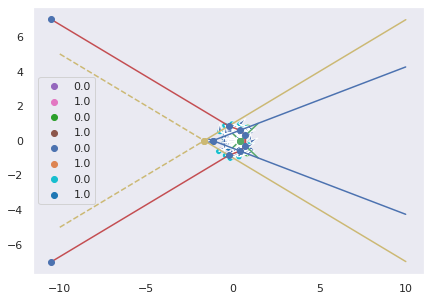

In [25]:
weights = [weights1, weights2, weights3, weights4]
bias = [bias1, bias2, bias3,bias4]

W = organize_input(weights, bias)

for w in W:
    print(w)
k = 50
n = 5000
I = [[-k, k], n]
sns.set(rc = {'figure.figsize':(7,7)})

fig, axs = plt.subplots(1,1)
axs.set_aspect('equal')
# axs.set_facecolor('xkcd:white')

# fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
# plt_ind_list = np.arange(3)+131
# ax.set_aspect('equal')


draw_sectors(axs,matrix_list=W,   
                colors_list=['y', 'b','g' ,'r'],   
                width_list=len(W)*[I],  
                height_list=len(W)*[I],  
                frame_shape=[[-10,10],[-10,10]],  
                remove_dotted_list=[False, False,False, True])

draw_polyline(axs, W, 12)

for i in range(len(original_set)):
        plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
                  head_width=0.2, head_length=0.5)
for i in range(len(original_set)):
        plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
                  head_width=0.2, head_length=0.5)
for i in range(len(original_set)):
        plt.arrow(t2r_set[i][0],t2r_set[i][1], t3r_set[i][0]-t2r_set[i][0],t3r_set[i][1]-t2r_set[i][1] , 
                  head_width=0.01, head_length=0.01)
sns.scatterplot(x1o,y1o, hue = y_labels, palette = palette2)
sns.scatterplot(x2o,y2o, hue = y_labels, palette = palette3)
sns.scatterplot(x3o,y3o, hue = y_labels, palette=customPalette)
sns.scatterplot(x0,y0, hue = y_labels, palette = palette)
plt.grid()
plt.show()